# Análise exploratória de dados

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
#from matplotlib.colors import LinearSegmentedColormap

# 1. Descrição dos dados

O naufrágio do Titanic é um dos naufrágios mais infames da história.

Em 15 de abril de 1912, durante sua viagem inaugural, o amplamente considerado "inafundável" RMS Titanic afundou após colidir com um iceberg. Infelizmente, não havia botes salva-vidas suficientes para todos a bordo, resultando na morte de 1502 dos 2224 passageiros e tripulantes.

Embora houvesse algum elemento de sorte envolvido na sobrevivência, parece que alguns grupos de pessoas tinham mais probabilidade de sobreviver do que outros.

# 1.1 - Descrição dos grupos de sobreviventes

Segue o glossário com as especificações dos grupos que poderiam ou não sobreviver.

- **Sobreviventes:**  
    0 = Não  
    1 = Sim

- **Classe Social:**  
    O status socioeconômico de cada pessoa:
    - **1ª classe** = Alta
    - **2ª classe** = Média
    - **3ª classe** = Baixa

- **Sexo:**  
    Gênero, sendo homem ou mulher.

- **Idade:**  
    Desde bebês de colo até idosos estavam a bordo do navio.

- **Relação familiar:**  
    Quantidade de parentes que estavam acompanhados, como mãe/pai, marido/esposa, filhos(as)/irmãos(as). Até mesmo crianças de colo com suas babás. **Obs:** Amantes e noivos foram ignorados.

- **Convés e tarifa:**  
    Com diversos andares, a depender da acomodação do andar, podendo facilitar ou não a evasão do navio:
    - **Convés A (Boat Deck):** O convés superior, onde ficavam os botes salva-vidas. Também abrigava a ponte de comando e as cabines de luxo dos passageiros de primeira classe.
    - **Convés B:** Continha mais cabines de primeira classe e também algumas áreas de serviço. Era o convés onde estavam localizados os salões e algumas áreas de recreação.
    - **Convés C:** Acomodava mais cabines de primeira classe e, em algumas áreas, salas de jantar e de estar.
    - **Convés D:** Era onde ficava a maior parte das cabines de primeira classe, e também o Restaurante de Primeira Classe. Tinha também áreas comuns e de serviço.
    - **Convés E:** Acomodações para passageiros de segunda classe, além de áreas de serviço.
    - **Convés F:** Principalmente cabines de segunda classe, com uma pequena quantidade de cabines de terceira classe.
    - **Convés G:** Acomodações para passageiros de terceira classe. Também tinha áreas de serviço para a tripulação.
    - **Convés H:** Era usado para áreas de serviço e instalações da tripulação. Não havia cabines de passageiros neste convés.
    - **Convés I (Orlop Deck):** O convés inferior, onde ficavam as áreas de máquinas, armazenamento e outras instalações de serviço. Este convés estava abaixo da linha da água e, em caso de afundamento, seria uma das primeiras áreas a ser inundada.

- **Cidade e porto de embarcação:**  
    Local onde os passageiros embarcaram no navio, por ordem da rota do navio:
    - **S:** Southampton
    - **C:** Cherbourg
    - **Q:** Queenstown


## 1.2 - Descrição do dicionários de dados

In [2]:
#Dicionario do titanic
dicionario_titanic = pd.read_csv("../data/external/dicionario.csv")
display(dicionario_titanic)

,Unnamed: 0,variavel,descrição,tipo,subtipo
0,0,survived,Sobreviventes da tragédia,quantitativo,discreto
1,1,pclass,Status socioeconomico,qualitativo,ordinal
2,2,sex,Gênero das pessoas,qualitativo,Nominal
3,3,age,Idade das pessoas,quantitativa,continua
4,4,sibsp,Relação familiar de irmãos e cônjuge,qualitativas,nominal
5,5,parch,Relação familiar de pais e filhos,qualitativas,nominal
6,6,fare,Tarifa do passageiro,quantitativo,continua
7,7,embarked,Porto de embarcação,quantitativa,continua
8,8,class,Número da classe social,quantitativa,discreto
9,9,who,"Homem, Mulher ou Criança",qualitativa,nominal


## 1.3 - Tratamento do cojunto de dados

### 1.3.1 - Tradução e substituição de valores

In [3]:

df = pd.read_csv('../data/raw/titanic.csv') #leitura dos dados
#Tradução do EN -> PT
#survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
df.rename(columns = {
        'survived': 'Sobreviventes',
        'pclass': 'Status socioeconômico',
        'sex': 'Gênero das pessoas',
        'age': 'Idade das pessoas',
        'sibsp': 'Relação familiar de irmãos e cônjuge',
        'parch': 'Relação familiar de pais e filhos',
        'fare': 'Tarifa do passageiro',
        'embarked': 'Porto de embarcação',
        'class': 'Número da classe social',
        'who': 'Homem, Mulher ou Criança',
        'adult_male': 'Homem adulto',
        'deck': 'Convés',
        'embark_town': 'Cidade de embarcação',
        'alive': 'Pessoas vivas',
        'alone': 'Pessoas sozinhas'
}, inplace=True)

#substituição dos valores pela descrição com replace
df.replace ({'Sobreviventes':{
        0: 'morto',
        1: 'vivo'
}}, inplace=True)

df.replace ({'Gênero das pessoas':{
        'male':'Masculino',
        'female':'Feminino'
}}, inplace=True)

df.replace ({'Porto de embarcação':{
        'S': 'Southampton',
        'C': 'Cherbourg',
        'Q': 'Queenstown'
}}, inplace=True)

df.replace ({'Número da classe social':{
        'First': 'Primeira Classe',
        'Second': 'Segunda Classe',
        'Third': 'Terceira Classe'
}}, inplace=True)

df.replace({'Homem, Mulher ou Criança':{
        'man':'Homem',
        'woman':'Mulher',
        'child':'Criança'
}}, inplace=True)

df.replace({'Homem adulto':{
        True : 'Sim',
        False : 'Não'
}}, inplace=True)
df.replace({'Convés':{
        'A': "Convés Primeira Classe com botes salva vidas",
        'B': "Convés Primeira Classe e áreas de serviço",
        'C': "Convés Primeira Classe e áreas de refeição",
        'D': "Convés Primeira Classe e Restaurante de Primeira Classe",
        'E': "Convés Segunda Classe e áreas de serviço",
        'F': "Convés Segunda Classe e parte da Terceira Classe",
        'G': "Convés Terceira Classe e áreas de serviço para tripulação",
        'H': "Convés da tripulação e áreas de serviço",
        'I': "Convés inferior (Máquinas, Armazenamento e serviços)"
}}, inplace=True)
df.replace ({'Pessoas vivas':{
        'no': 'Não',
        'yes': 'Sim'
}}, inplace=True)
df.replace({'Pessoas sozinhas':{
        True :'Sim',
        False: 'Não'
}}, inplace=True)

display(df)

,Unnamed: 0,Sobreviventes,Status socioeconômico,Gênero das pessoas,Idade das pessoas,Relação familiar de irmãos e cônjuge,Relação familiar de pais e filhos,Tarifa do passageiro,Porto de embarcação,Número da classe social,"Homem, Mulher ou Criança",Homem adulto,Convés,Cidade de embarcação,Pessoas vivas,Pessoas sozinhas
0,0,morto,3,Masculino,22.0,1,0,7.2500,Southampton,Terceira Classe,Homem,Sim,NaN,Southampton,Não,Não
1,1,vivo,1,Feminino,38.0,1,0,71.2833,Cherbourg,Primeira Classe,Mulher,Não,Convés Primeira Classe e áreas de refeição,Cherbourg,Sim,Não
2,2,vivo,3,Feminino,26.0,0,0,7.9250,Southampton,Terceira Classe,Mulher,Não,NaN,Southampton,Sim,Sim
3,3,vivo,1,Feminino,35.0,1,0,53.1000,Southampton,Primeira Classe,Mulher,Não,Convés Primeira Classe e áreas de refeição,Southampton,Sim,Não
4,4,morto,3,Masculino,35.0,0,0,8.0500,Southampton,Terceira Classe,Homem,Sim,NaN,Southampton,Não,Sim
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,morto,2,Masculino,27.0,0,0,13.0000,Southampton,Segunda Classe,Homem,Sim,NaN,Southampton,Não,Sim
887,887,vivo,1,Feminino,19.0,0,0,30.0000,Southampton,Primeira Classe,Mulher,Não,Convés Primeira Classe e áreas de serviço,Southampton,Sim,Sim
888,888,morto,3,Feminino,NaN,1,2,23.4500,Southampton,Terceira Classe,Mulher,Não,NaN,Southampton,Não,Não
889,889,vivo,1,Masculino,26.0,0,0,30.0000,Cherbourg,Primeira Classe,Homem,Sim,Convés Primeira Classe e áreas de refeição,Cherbourg,Sim,Sim


### 1.3.2 - Limpeza nas linhas duplicas, zeradas e sem informações

In [4]:
#colunas zeradas, NaN
# Verificar se há valores ausentes em cada célula
valores_faltantes = df.isnull() #função apenas para sabe se existia
#funções de verificação de linhas/colunas ausentes:
#df.isnull().any(axis=1) e #df.isnull().any() 

#valores ausentes na coluna
contg_coluna = df.isnull().sum()
print(contg_coluna)

# Contar o total de valores ausentes em todo o DataFrame
total = df.isnull().sum().sum()
print(f"\nTotal de valores ausentes: {total}")
print("\nNa coluna 'Convés' os dados ausentes representa 77% dos dados, excluir esses dados não é viável,\nlogo não será feito uso para perguntas e hipóteses para garantir uma boa analises dos dados!")

duplicados = df.duplicated()
qntd_duplicados = df.duplicated().sum()
print(f"\nAs linhas duplicadas são:\n{duplicados}\nsomando ao todo {qntd_duplicados} linhas duplicadas")
# Remover duplicatas, função:
#df.drop_duplicates()
#como não há linhas, sem necessidade de uso.


Unnamed: 0                                0
Sobreviventes                             0
Status socioeconômico                     0
Gênero das pessoas                        0
Idade das pessoas                       177
Relação familiar de irmãos e cônjuge      0
Relação familiar de pais e filhos         0
Tarifa do passageiro                      0
Porto de embarcação                       2
Número da classe social                   0
Homem, Mulher ou Criança                  0
Homem adulto                              0
Convés                                  688
Cidade de embarcação                      2
Pessoas vivas                             0
Pessoas sozinhas                          0
dtype: int64

Total de valores ausentes: 869

Na coluna 'Convés' os dados ausentes representa 77% dos dados, excluir esses dados não é viável,
logo não será feito uso para perguntas e hipóteses para garantir uma boa analises dos dados!

As linhas duplicadas são:
0      False
1      False
2      

### 1.3.3 - Tipos de dados, instancias e variaveis

In [5]:
#tipos de daods: int, float, str, bool...

tipos = df.dtypes.value_counts()
print("Tipos de dados de cada coluna:\n")
print(df.dtypes)

print("Quantidade dos tipos de dados:")
for tipo, count in tipos.items():
    print(f"- {count} variáveis do tipo '{tipo}'")

# quantidade de linhas
num_instancias = df.shape[0]
# quantidade de colunas
num_variaveis = df.shape[1]
print(f"\nO conjunto de dados possui {num_instancias} instâncias e {num_variaveis} variáveis")


Tipos de dados de cada coluna:

Unnamed: 0                                int64
Sobreviventes                            object
Status socioeconômico                     int64
Gênero das pessoas                       object
Idade das pessoas                       float64
Relação familiar de irmãos e cônjuge      int64
Relação familiar de pais e filhos         int64
Tarifa do passageiro                    float64
Porto de embarcação                      object
Número da classe social                  object
Homem, Mulher ou Criança                 object
Homem adulto                             object
Convés                                   object
Cidade de embarcação                     object
Pessoas vivas                            object
Pessoas sozinhas                         object
dtype: object
Quantidade dos tipos de dados:
- 10 variáveis do tipo 'object'
- 4 variáveis do tipo 'int64'
- 2 variáveis do tipo 'float64'

O conjunto de dados possui 891 instâncias e 16 variáveis


## 1.4 - Resumos estatísticos de alguns dados
Resumos, variância, desvio padrão, média, moda e mediana dos dados. Informações dos sobreviventes para uso das perguntas, hipoteses e insights.

,Unnamed: 0,Status socioeconômico,Idade das pessoas,Relação familiar de irmãos e cônjuge,Relação familiar de pais e filhos,Tarifa do passageiro
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,445.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,222.500000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,445.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,667.500000,3.000000,38.000000,1.000000,0.000000,31.000000
max,890.000000,3.000000,80.000000,8.000000,6.000000,512.329200


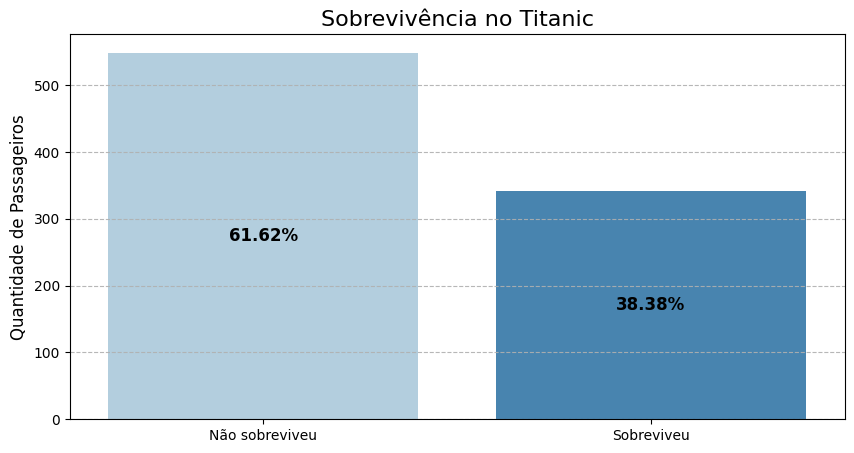

Quantidade de sobreviventes da 1ª classe: 136

Quantidade de sobreviventes da 2ª classe: 87

Quantidade de sobreviventes da 3ª classe: 119

Total de pessoas na primeira classe: 216

Total de pessoas na segunda classe: 184

Total de pessoas na terceira classe: 491


Quantidade de sobreviventes homens: 88

Quantidade de sobreviventes mulheres: 205

Quantidade de sobreviventes crianças: 49

Total de Homens: 537

Total de Mulhres: 271

Total de Criança: 83


Quantidade de sobreviventes sozinhos: 163

Quantidade de sobreviventes acompanhados: 116

Quantidade de sozinhos totais: 537

Quantidade de acompanhados totais: 283



In [6]:
#codigo de resumo estatistico dos dados:
display((df.describe()))

# Configurar a figura
figura = plt.figure(figsize=(10, 5))

# Contar os sobreviventes e calcular percentuais
total = 891
quantidade = df['Sobreviventes'].value_counts()
percentual_sobreviventes = (quantidade / total) * 100

dados = pd.DataFrame({
    'Total_sobreviventes': quantidade,
    'percentual': percentual_sobreviventes
})#.reset_index

# Criar o gráfico de barras
paleta_cores = sns.color_palette("Blues", 2)

grafico = sns.countplot(
    data=df,
    x='Sobreviventes',
    hue = 'Sobreviventes',
    palette=paleta_cores,
    order=quantidade.index
)

# Adicionar título e rótulos
grafico.set_title("Sobrevivência no Titanic", fontsize=16)
grafico.set_xlabel("", fontsize=12)
grafico.set_ylabel("Quantidade de Passageiros", fontsize=12)

# Ajustar os rótulos do eixo X
plt.xticks(ticks=[0, 1], labels=["Não sobreviveu", "Sobreviveu"])

# Adicionar linhas de fundo
grafico.grid(True, axis='y', linestyle='--', alpha=0.9)

# Adicionar porcentagens no meio das barras
for index, row in dados.iterrows():
    grafico.text(
        x=index,  # Posição no eixo X (índice do DataFrame)
        y=row['Total_sobreviventes'] / 2,  # Posição no eixo Y (meio da barra)
        s=f"{row['percentual']:.2f}%",  # Texto da porcentagem
        ha='center',  # Alinhamento horizontal
        va='center',  # Alinhamento vertical
        fontsize=12,
        color='black',
        weight='bold'
    )

# Mostrar o gráfico
plt.show()


#1ª, 2ª e 3ª classe
# Filtrar os sobreviventes da 1ª classe
sobreviventes_1_classe = df.loc[(df['Sobreviventes'] == 'vivo') & (df['Status socioeconômico'] == 1)]
#pessoas na 1ªclasse
primeira_classe = df.loc[(df['Status socioeconômico'] == 1)]
# Filtrar os sobreviventes da 2ª classe
sobreviventes_2_classe = df.loc[(df['Sobreviventes'] == 'vivo') & (df['Status socioeconômico'] == 2)]
segunda_classe = df.loc[(df['Status socioeconômico'] == 2)]
# Filtrar os sobreviventes da 3ª classe
sobreviventes_3_classe = df.loc[(df['Sobreviventes'] == 'vivo') & (df['Status socioeconômico'] == 3)]
terceira_classe = df.loc[(df['Status socioeconômico'] == 3)]

# Contagem de sobreviventes por classe
print(f"Quantidade de sobreviventes da 1ª classe: {sobreviventes_1_classe.shape[0]}\n")
print(f"Quantidade de sobreviventes da 2ª classe: {sobreviventes_2_classe.shape[0]}\n")
print(f"Quantidade de sobreviventes da 3ª classe: {sobreviventes_3_classe.shape[0]}\n")
print(f"Total de pessoas na primeira classe: {primeira_classe.shape[0]}\n")
print(f"Total de pessoas na segunda classe: {segunda_classe.shape[0]}\n")
print(f"Total de pessoas na terceira classe: {terceira_classe.shape[0]}\n\n")

#homens, mulheres e crianças
homens = df.loc[(df['Sobreviventes'] == 'vivo') & (df['Homem, Mulher ou Criança'] == 'Homem')]
homens_geral = df.loc[df['Homem, Mulher ou Criança'] == 'Homem']
mulheres = df.loc[(df['Sobreviventes'] == 'vivo') & (df['Homem, Mulher ou Criança'] == 'Mulher')]
mulheres_geral = df.loc[df['Homem, Mulher ou Criança'] == 'Mulher']
criancas = df.loc[(df['Sobreviventes'] == 'vivo') & (df['Homem, Mulher ou Criança'] == 'Criança')]
criancas_geral = df.loc[df['Homem, Mulher ou Criança'] == 'Criança']
total_sobreviventes_pessoas = homens.shape[0] + mulheres.shape[0] + criancas.shape[0]

#contagem
print(f"Quantidade de sobreviventes homens: {homens.shape[0]}\n")
print(f"Quantidade de sobreviventes mulheres: {mulheres.shape[0]}\n")
print(f"Quantidade de sobreviventes crianças: {criancas.shape[0]}\n")
print(f"Total de Homens: {homens_geral.shape[0]}\n")
print(f"Total de Mulhres: {mulheres_geral.shape[0]}\n")
print(f"Total de Criança: {criancas_geral.shape[0]}\n\n")

#pessoas sozinhas e acompanhadas (sibsp / parch)

sozinhos = df.loc[(df['Sobreviventes']=='vivo') & (df['Pessoas sozinhas']== 'Sim')]
acompanhados = df.loc[(df['Sobreviventes']=='vivo') & (df['Relação familiar de irmãos e cônjuge']) != 0 & (df['Relação familiar de pais e filhos'] != 0)]
sozinhos_totais = df.loc[df['Pessoas sozinhas'] == 'Sim']
acompanhados_totais = df.loc[(df['Relação familiar de irmãos e cônjuge']) != 0 & (df['Relação familiar de pais e filhos'] != 0)]
print(f"Quantidade de sobreviventes sozinhos: {sozinhos.shape[0]}\n")
print(f"Quantidade de sobreviventes acompanhados: {acompanhados.shape[0]}\n")
print(f"Quantidade de sozinhos totais: {sozinhos_totais.shape[0]}\n")
print(f"Quantidade de acompanhados totais: {acompanhados_totais.shape[0]}\n")

## 2. Perguntas de partida e hipóteses

### 2.1 - Passageiros de 1ª classe tiveram mais chances de sobreviver do que os de média e baixa classe?

**Hipóteses:** O privilégio econômico das classes sociais foi determinante na sobrevivência dos tripulantes

C:\Users\reisd\AppData\Local\Temp\ipykernel_364\3483149402.py:22: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  grafico1 = sns.barplot(


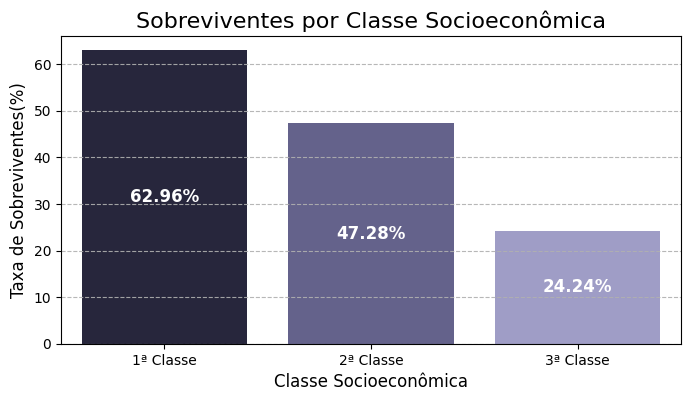

In [7]:
# Configurar o grafico
figura = plt.figure(figsize=(8, 4))


# Contar o número de sobreviventes por classe
total_sobreviventes_1_classe = sobreviventes_1_classe.shape[0]
total_sobreviventes_2_classe = sobreviventes_2_classe.shape[0]
total_sobreviventes_3_classe = sobreviventes_3_classe.shape[0]


# Criar um DataFrame com os totais
dados_class = pd.DataFrame({
    'Classe': ['1ª Classe', '2ª Classe', '3ª Classe'],
    'Total': [total_sobreviventes_1_classe, total_sobreviventes_2_classe, total_sobreviventes_3_classe],
    'total_classe': [primeira_classe.shape[0], segunda_classe.shape[0], terceira_classe.shape[0]]
})

dados_class['Percentual'] = (dados_class['Total'] / dados_class['total_classe']) * 100
#cor
palette_platform_cubehelix = sns.cubehelix_palette(start=3,rot=0,reverse=True,  n_colors=4)
                                                   
grafico1 = sns.barplot(
    data=dados_class,
    x='Classe',
    y='Percentual',
    hue = 'Classe',
    palette=palette_platform_cubehelix
)
# Adicionar linhas de fundo
grafico1.grid(True, axis='y', linestyle='--', alpha=0.9)

grafico1.set_title("Sobreviventes por Classe Socioeconômica", fontsize=16)
grafico1.set_xlabel("Classe Socioeconômica", fontsize=12)
grafico1.set_ylabel("Taxa de Sobreviventes(%)", fontsize=12)

grafico1.set_xticks([0, 1, 2])
grafico1.set_xticklabels(["1ª Classe", "2ª Classe", "3ª Classe"])


for patch, (_, row) in zip(grafico1.patches, dados_class.iterrows()):
    # Posição central da barra
    x = patch.get_x() + patch.get_width() / 2  
    # Altura do texto baseada no percentual
    y = row['Percentual'] / 2  
    
    grafico1.text(
        x=x,  # Posição no eixo X
        y=y,  # Posição no eixo Y
        s=f"{row['Percentual']:.2f}%",  # Texto da porcentagem
        ha='center',  # Centralizado horizontalmente
        va='center',  # Centralizado verticalmente
        fontsize=12,
        color='white',
        weight='bold'
    )

plt.show()

### 2.2 - Mulheres e Crianças tiverem mais chanves de sobreviver do que Homens?

**Hipóteses:** O protocolo de evacuação "mulheres e crianças primeiro" influenciou as taxas de sobrevivência

C:\Users\reisd\AppData\Local\Temp\ipykernel_364\2083488273.py:18: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  grafico2 = sns.barplot(


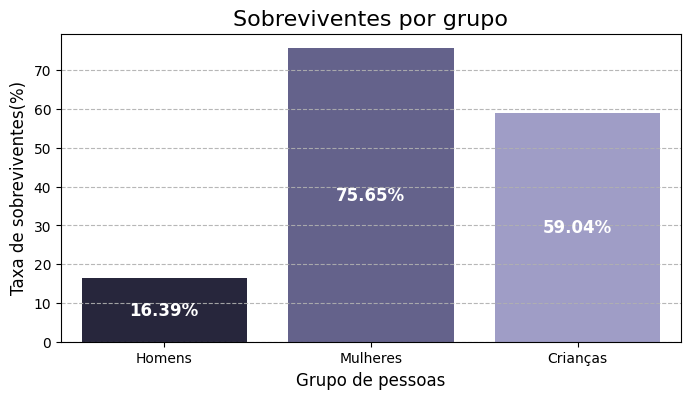

In [8]:
#tamanho
figura = plt.figure(figsize=(8, 4))
#cor
palette_platform_cubehelix = sns.cubehelix_palette(start=3,rot=0,reverse=True,  n_colors=4)

total_homens_vivos = homens.shape[0]
total_mulheres_vivos = mulheres.shape[0]
total_criancas_vivos = criancas.shape[0]

dados_pessoas = pd.DataFrame({
    'Grupos' : ['Homens', 'Mulheres', 'Crianças'],
    'total_vivas': [total_homens_vivos, total_mulheres_vivos, total_criancas_vivos],
    'total_grupo': [homens_geral.shape[0], mulheres_geral.shape[0], criancas_geral.shape[0]]
})

dados_pessoas['porcentagem'] = (dados_pessoas['total_vivas'] / dados_pessoas['total_grupo']) * 100

grafico2 = sns.barplot(
    data = dados_pessoas,
    x='Grupos',
    y = 'porcentagem',
    hue = 'Grupos',
    palette=palette_platform_cubehelix
)
# Adicionar linhas de fundo
grafico2.grid(True, axis='y', linestyle='--', alpha=0.9)
grafico2.set_title("Sobreviventes por grupo", fontsize=16),
grafico2.set_xlabel("Grupo de pessoas", fontsize=12),
grafico2.set_ylabel("Taxa de sobreviventes(%)", fontsize=12)

for patch, (_, row) in zip(grafico2.patches, dados_pessoas.iterrows()):
    # Posição X no centro da barra
    x = patch.get_x() + patch.get_width() / 2
    # Posição Y com base na altura da barra
    y = patch.get_height() / 2
    
    # Adicionar o texto no gráfico
    grafico2.text(
        x=x,  # Posição no eixo X
        y=y,  # Posição no eixo Y (meio da barra)
        s=f"{row['porcentagem']:.2f}%",  # Formatação com 2 casas decimais
        ha='center',  # Centralizado horizontalmente
        va='center',  # Centralizado verticalmente
        fontsize=12,  # Tamanho da fonte
        color='white',  # Cor do texto (branca para contraste)
        weight='bold'  # Negrito para melhor visibilidade
    )

plt.show()

### 2.3 - Quem tinham mais probabilidade de sobreviver os passageiros acompanhados ou os sozinhos?

**Hipóteses:** Estar acompanhado pode ter facilitado a fuga do navio para sobreviver, devido ao suporte emocional ou à ajuda prática de companheiros.

C:\Users\reisd\AppData\Local\Temp\ipykernel_364\3529169878.py:14: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  grafico3 = sns.barplot(


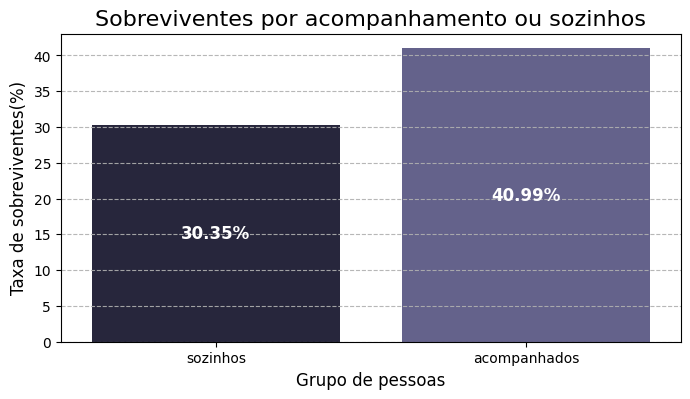

In [11]:
#tamanho
figura = plt.figure(figsize=(8, 4))
#cor
palette_platform_cubehelix = sns.cubehelix_palette(start=3,rot=0,reverse=True,  n_colors=4)

dados_grupo = pd.DataFrame({
    'Situação': ['sozinhos', 'acompanhados'],
    'total_vivos': [sozinhos.shape[0], acompanhados.shape[0]],
    'total_geral':[sozinhos_totais.shape[0], acompanhados_totais.shape[0]]
})

dados_grupo['Percentual'] = (dados_grupo['total_vivos']/dados_grupo['total_geral']) *100

grafico3 = sns.barplot(
    data = dados_grupo,
    x='Situação',
    y = 'Percentual',
    hue = 'Situação',
    palette=palette_platform_cubehelix
)
# Adicionar linhas de fundo
grafico3.grid(True, axis='y', linestyle='--', alpha=0.9)
grafico3.set_title("Sobreviventes por acompanhamento ou sozinhos", fontsize=16),
grafico3.set_xlabel("Grupo de pessoas", fontsize=12),
grafico3.set_ylabel("Taxa de sobreviventes(%)", fontsize=12)

for patch, (_, row) in zip(grafico3.patches, dados_grupo.iterrows()):
    # Posição 
    x = patch.get_x() + patch.get_width() / 2
    y = patch.get_height() / 2
 
    grafico3.text(
        x=x,  # Posição no eixo X
        y=y,  # Posição no eixo Y (meio da barra)
        s=f"{row['Percentual']:.2f}%",  # Formatação com 2 casas decimais
        ha='center',  # Centralizado horizontalmente
        va='center',  # Centralizado verticalmente
        fontsize=12,  # Tamanho da fonte
        color='white',  # Cor do texto (branca para contraste)
        weight='bold'  # Negrito para melhor visibilidade
    )

plt.show()

## 3. Insights

#### 3.1 - Hipótese: O privilégio econômico das classes sociais foi determinante na sobrevivência dos tripulantes

Os gráficos indicam que, de fato, as pessoas da 1ª classe sobreviveram em maior quantidade que as da 2ª e 3ª classes. Mais do que isso, a quantidade de sobreviventes é proporcional ao nível econômico das classes: mais sobreviventes na primeira, em seguida na segunda, e maior quantidade de mortes da terceira. Isso comprova que as questões de privilégio foram fatores determinantes na sobrevivência dos tripulantes.

#### 3.2 - Hipótese: O protocolo de evacuação "mulheres e crianças primeiro" influenciou as taxas de sobrevivência

Ao analisar os gráficos e identificar quais grupos sobreviveram mais que outros, é evidente que mulheres e crianças tiveram taxas de sobrevivência superiores às dos homens. Observa-se que os homens eram a maioria a bordo do navio, mas mesmo assim, sua taxa de sobrevivência foi inferior a 20%. Por outro lado, embora mulheres e crianças estivessem em menor número, ambos os grupos apresentaram taxas de sobrevivência superiores a 50%. Essa análise confirma a hipótese de que, em momentos de desastres e acidentes como este, o código de conduta de evacuação "mulheres e crianças primeiro" foi aplicado durante a colisão do navio.

#### 3.3 - Hipótese: Estar acompanhado pode ter facilitado a fuga do navio para sobreviver, devido ao suporte emocional ou à ajuda prática de companheiros.

O gráfico reforça a hipótese de que estar acompanhado aumentou as chances de sobrevivência. A taxa de sobrevivência para pessoas acompanhadas foi de 40,99%, enquanto para aquelas que estavam sozinhas foi de apenas 30,35%. Isso sugere que a presença de outra pessoa pode ter ajudado em diversos aspectos, como encontrar saídas, oferecer suporte emocional ou até mesmo em ações diretas para alcançar os botes. Esse dado destaca a importância da interação social e do trabalho em equipe em situações de emergência.